In [2]:
import tensorflow as tf

In [3]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
mnist = tf.keras.datasets.mnist

In [7]:
mnist


<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [9]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [13]:
mdata = mnist.load_data()

In [15]:
print(mdata)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [16]:
len(mdata) # train 학습데이터 ,  test 테스트

2

In [17]:
len(mdata[0]) # x,y  데이터 2개

2

In [18]:
len(mdata[0][1])

60000

In [19]:
mdata[0][0].shape

(60000, 28, 28)

In [32]:
img = mdata[0][1][0]
print(mdata[0][1][0])

5


TypeError: ignored

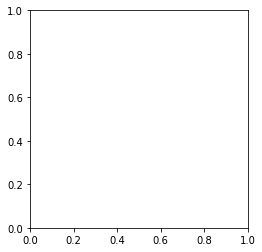

In [33]:
plt.imshow(img)

TypeError: ignored

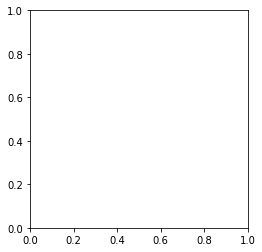

In [37]:
plt.imshow(img, cmap=plt.cm.binary)

In [38]:
def show_num(img, tag):
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('tag : ' +str(tag), size = 40)
  plt.show()

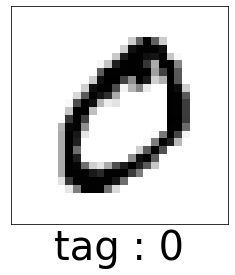

In [40]:
img = mdata[0][0][1]
tag = mdata[0][1][1]
show_num(img,tag)

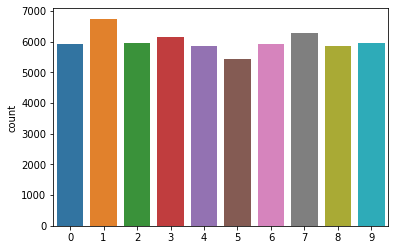

In [42]:
sns.countplot(mdata[0][1])

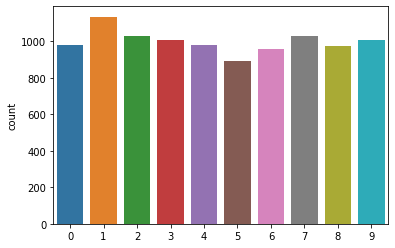

In [44]:
sns.countplot(mdata[1][1])

In [48]:
(x_train, y_train), (x_test, y_test) = mdata

In [50]:
print(len(x_train))
print(len(x_test))

60000
10000


In [52]:
x_train[0].max()

255

In [53]:
x_train[0].min()

0

In [55]:
x_train, x_test =  x_train/255.0, x_test/255.0

In [57]:
x_train[0].max()

0.00392156862745098

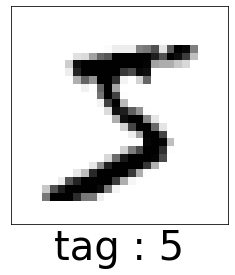

In [59]:
show_num(x_train[0], y_train[0])

In [66]:
print(x_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [78]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
model.fit(x_train, y_train,epochs=8, verbose=0)

In [84]:
model.evaluate(x_test,y_test, verbose=2)

313/313 - 0s - loss: 0.2963 - accuracy: 0.9161


[0.2962853014469147, 0.916100025177002]

In [89]:
result = model.predict(x_test)

In [97]:
i = result[0].max()

In [99]:
result[0].tolist().index(i)

7

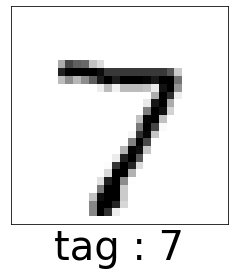

In [100]:
show_num(x_test[0],y_test[0])